# Unsupervised Learning

**Introduction to Python for Data Science** \
Course with Hacktiv8

***

**Sesi 14**

Kamis, 24 Juni 2021 • 19:00 - 22:00 WIB

- Principal Component Analysis (PCA)
- K-Means Clustering

***

Algoritma _unsupervised machine learning_ digunakan untuk mengelompokkan data tidak terstruktur menurut kesamaan dan pola yang berbeda dalam kumpulan data. _Unsupervised algorithm_ berfungsi dengan data tak berlabel. Tujuannya adalah eksplorasi. Jika _supervised machine learning_ berfungsi di bawah aturan yang ditetapkan dengan jelas, _unsupervised learning_ berfungsi dalam kondisi hasil yang tidak diketahui dan karenanya perlu didefinisikan dalam proses.

## Principal Component Analysis (PCA)

PCA merupakan teknik _unsupervised dimensionality reduction_. Titik data yang serupa dapat dikelompokkan berdasarkan korelasi fitur di antara mereka tanpa pengawasan (atau label). _Principal component_ adalah satu set nilai variabel yang tidak berkorelasi secara linier

Implementasi menggunakan dataset **The Breast Cancer**. Terdiri dari dua kelas, di mana setiap kelas menandakan apakah seorang pasien menderita kanker payudara yang ganas (_malignant_) atau jinak (_benign_).

In [1]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Eksplorasi data secara singkat terlebih dahulu:

In [2]:
print('Features:', breast.feature_names)
print('Labels  :', breast.target_names)
print('Dataset shape:', breast.data.shape)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels  : ['malignant' 'benign']
Dataset shape: (569, 30)


Membuat _data frame_ dari dataset:

In [3]:
import pandas as pd

df_breast = pd.DataFrame(breast.data, columns=breast.feature_names)
df_breast["label"] = breast.target
df_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Melakukan pengecekan distribusi nilai target:

In [4]:
df_breast.label.value_counts()

1    357
0    212
Name: label, dtype: int64

Sesuai deskripsi dari dataset dimana _class distribution_ disebutkan yaitu `212 - Malignant, 357 - Benign`, sehingga label yang masih dalam format 0 diubah menjadi _malignant_ dan 1 menjadi _benign_:

In [5]:
df_breast.label.replace({0: 'Malignant', 1: 'Benign'}, inplace=True)
df_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,Malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Malignant


Memisahkan dataset menjadi set _training_ dan _test_:

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_breast.drop(columns='label'),
    df_breast.label,
    test_size=0.2,
    random_state=11
)

print('Training size:', x_train.shape)
print(y_train.value_counts(), end='\n\n')
print('Test size:', x_test.shape)
print(y_test.value_counts())

Training size: (455, 30)
Benign       281
Malignant    174
Name: label, dtype: int64

Test size: (114, 30)
Benign       76
Malignant    38
Name: label, dtype: int64


Karena keluaran PCA dipengaruhi berdasarkan skala fitur data, harus dilakukan standarisasi (normalisasi) pada data fitur (tidak termasuk label). Setiap fitur data harus didistribusikan secara normal sehingga akan menskalakan distribusi ke rata-rata nol dan deviasi standar satu. Setelah itu, dibuat _data frame_ baru yang berisi fitur yang dinormalisasi untuk melihat pengaruhnya:

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

df_train = pd.DataFrame(x_train_scaled, columns=breast.feature_names)
df_train['label'] = y_train.reset_index(drop=True)
df_test = pd.DataFrame(x_test_scaled, columns=breast.feature_names)
print('Training set:')
display(df_train)
print('Test set:')
display(df_test)

Training set:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,1.554453,0.460523,1.539848,1.543290,0.884854,0.985191,1.301401,1.988770,0.925679,-0.405260,...,-0.029532,1.328199,1.465244,0.483053,1.053478,0.810613,1.914884,1.152408,0.175650,Malignant
1,-0.534844,-0.651777,-0.546279,-0.541725,-0.369918,-0.690749,-0.706313,-0.697946,-0.355721,-0.520834,...,-0.411748,-0.545959,-0.495372,-0.678401,-0.461155,-0.516363,-0.461469,-0.466480,-0.463297,Benign
2,-0.727354,2.351199,-0.723647,-0.700643,-0.240090,-0.371513,-0.241673,-0.763084,-0.065662,-0.178192,...,2.158327,-0.655502,-0.644129,0.318369,-0.342608,0.061613,-0.738761,-0.033692,-0.679615,Benign
3,2.083854,0.728604,2.032537,2.329337,0.983102,0.180243,1.871774,2.269753,-0.333691,-0.916505,...,0.113799,1.734133,2.033124,0.335704,-0.290901,0.622534,1.589731,-1.374359,-0.738004,Malignant
4,-0.894384,-0.578878,-0.885824,-0.819974,0.751517,-0.512379,-0.746300,-0.644815,-0.377750,0.058395,...,0.120389,-0.837873,-0.744847,0.158019,-0.688791,-0.817668,-0.648205,0.151789,-0.312040,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.843426,0.133653,-0.843946,-0.779817,0.590109,-0.699896,-1.058521,-1.084606,0.452038,-0.365829,...,0.011655,-0.928015,-0.807885,0.396377,-1.013599,-1.259914,-1.470052,0.630133,-1.067765,Benign
451,-0.987808,0.258287,-0.944126,-0.900572,0.786605,0.418068,-0.083686,-0.545960,-0.546646,0.768155,...,-0.082251,-0.939954,-0.853780,0.010671,-0.015341,-0.122676,-0.470586,-0.487631,0.143952,Benign
452,1.293998,0.502852,1.248340,1.227163,-0.409217,0.624794,0.180280,0.277323,0.499770,-0.291046,...,1.426844,1.584893,1.758113,0.717077,1.420471,0.872201,1.334470,1.259791,0.794020,Malignant
453,0.331450,0.815613,0.316337,0.191063,-0.350268,-0.044777,0.256330,0.633151,-0.366736,-0.272010,...,0.021540,-0.014963,-0.102856,-0.327364,-0.364047,0.025134,0.465369,-0.567355,-0.897602,Malignant


Test set:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.410070,0.752120,1.437205,1.386651,-0.825369,0.672359,0.246517,0.451533,-0.183154,-1.044316,...,1.457298,1.046275,1.743087,1.427742,-0.045669,1.908533,0.507886,0.817872,0.469058,0.433119
1,1.526142,-0.268469,1.568588,1.574618,1.053279,1.107763,1.956410,2.006650,0.771471,-0.292406,...,2.158939,0.112152,1.996796,2.399211,0.457050,0.801880,1.903082,1.636832,1.201219,0.434231
2,1.342126,0.474633,1.277081,1.335387,-0.484307,-0.057583,0.204813,0.752696,-0.862406,-1.136776,...,1.769601,0.143454,1.728163,1.745613,-0.604726,-0.150283,-0.050192,0.940944,-0.575491,-1.030507
3,2.098009,0.702737,2.131075,2.124281,1.383113,1.877953,2.326846,2.711664,1.267141,0.420074,...,2.054838,0.499311,1.910236,2.129557,0.734412,1.981679,2.018204,1.902729,1.502218,0.905238
4,1.418563,-0.169702,1.355090,1.398043,0.583091,0.377821,0.502879,1.019120,0.367591,-0.456929,...,2.036099,0.400462,1.853525,2.243847,1.263134,0.590638,0.514519,1.399805,1.028754,-0.082376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.506452,-0.893991,-1.468018,-1.196479,-0.986777,-0.531771,-0.540843,-0.670103,0.415322,0.440469,...,-1.328238,-1.319511,-1.275446,-1.047359,-1.376139,-0.836345,-0.875892,-1.053734,-0.765852,-0.562280
110,-0.180966,-1.267893,-0.160340,-0.284267,0.569055,0.240614,-0.155810,-0.141343,0.532814,0.008086,...,-0.287436,-1.413418,-0.205990,-0.360545,0.188356,0.077984,-0.102305,-0.396135,0.260799,-0.147438
111,1.509156,3.099004,1.457733,1.600250,-0.897652,0.127189,0.284542,0.417048,-1.427837,-1.338010,...,2.402535,3.245666,2.154990,2.836729,0.327037,0.960153,0.569474,0.691761,-0.311913,-0.486096
112,-0.197952,-1.547732,-0.279406,-0.270311,-1.630304,-1.278910,-1.086095,-1.165427,-1.659150,-1.308097,...,-0.289518,-1.444720,-0.373736,-0.338937,-1.864557,-1.255297,-1.257830,-1.441487,-1.037565,-1.251274


Saatnya memproyeksikan data ke PCA dengan memberikan parameter jumlah komponen (`n_components=2`) lalu melakukan _fit & transform_ pada _training set_ yang sudah dinormalisasi. Untuk _test set_ hanya menggunakan _transform_. Kemudian membuat _data frame_ yang berisi nilai _principal component_ untuk semua sampel:

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

cols = [l+str(x) for l, x in zip(["pc"]*pca.n_components, range(1, pca.n_components+1))]
df_train_pca = pd.DataFrame(x_train_pca, columns=cols)
df_train_pca['label'] = y_train.reset_index(drop=True)
df_test_pca = pd.DataFrame(x_test_pca, columns=cols)
print('Training set:')
display(df_train_pca)
print('Test set:')
display(df_test_pca)

Training set:


,pc1,pc2,label
0,5.600828,-1.263817,Malignant
1,-2.745215,-0.629007,Benign
2,-1.448738,0.710150,Benign
3,6.292724,-3.769743,Malignant
4,-3.024458,0.429116,Benign
...,...,...,...
450,-3.230482,1.066934,Benign
451,-0.838136,3.083979,Benign
452,4.551736,-1.149903,Malignant
453,0.119108,-0.604838,Malignant


Test set:


,pc1,pc2
0,3.295606,-2.369551
1,5.992821,-2.178985
2,2.543639,-4.507795
3,7.497559,-1.090237
4,4.525127,-2.463948
...,...,...
109,-3.029182,1.628430
110,-1.066676,0.455437
111,4.084910,-4.811478
112,-4.777514,-2.909225


Visualisasi distribusi sampel _training set_:

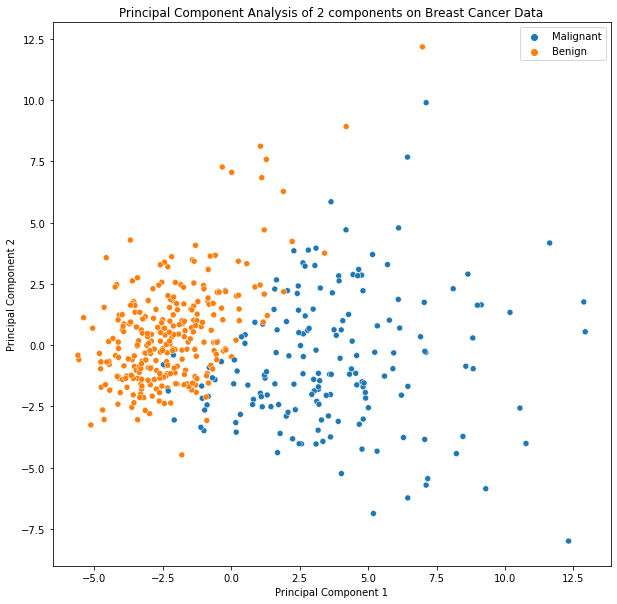

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x='pc1', y='pc2', hue='label', data=df_train_pca)
plt.title('Principal Component Analysis of 2 components on Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='')
plt.show()

Setelah memiliki _principal components_, `explained_variance_ratio` dapat memberikan jumlah informasi atau varians yang dimiliki setiap _principal component_ setelah memproyeksikan data ke sub-ruang dimensi yang lebih rendah.

In [10]:
expvar = pca.explained_variance_ratio_
print('Explained variation per principal component:', expvar)
print('Sum of explained variance:', sum(expvar))
print('Missing:', 1-sum(expvar))

Explained variation per principal component: [0.44309681 0.19312937]
Sum of explained variance: 0.636226173689098
Missing: 0.36377382631090205


Dari keluaran di atas, dapat diamati bahwa _principal component 1_ menampung 44,3% informasi sedangkan _principal component 2_ hanya menampung 19,3% informasi. Hal lain yang perlu diperhatikan juga adalah saat memproyeksikan data tiga puluh dimensi menjadi data dua dimensi, 36,3% informasi hilang.

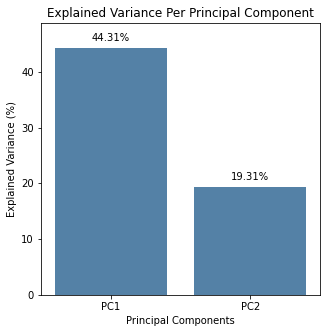

In [11]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(
    x=[x.upper() for x in df_train_pca.drop(columns='label').columns], 
    y=[round(y*100, 2) for y in expvar], 
    color='steelblue'
)

for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.2f') + '%',
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', 
        va='bottom',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Explained Variance Per Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (%)')
plt.margins(y=0.1)
plt.show()

Langkah selanjutnya adalah membuat model _logistic regression_, _fitting_ data _training_, dan membuat hasil prediksi:

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression(random_state=11)
lr.fit(x_train_pca, y_train)

train_pred = lr.predict(x_train_pca)
test_pred = lr.predict(x_test_pca)

print('Training accuracy:', accuracy_score(y_train, train_pred))
print(classification_report(y_train, train_pred))
print('Test accuracy:', accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

Training accuracy: 0.9538461538461539
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96       281
   Malignant       0.95      0.93      0.94       174

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455

Test accuracy: 0.9298245614035088
              precision    recall  f1-score   support

      Benign       0.93      0.97      0.95        76
   Malignant       0.94      0.84      0.89        38

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



---

## K-Means Clustering

_Clustering_ adalah tugas mengelompokkan sekumpulan objek sedemikian rupa sehingga objek dalam kluster yang sama lebih mirip atau serupa satu sama lain daripada objek di kluster lain, sehingga jarak di antara mereka harus serendah mungkin. _Clustering_ tidak memiliki target untuk diprediksi.

_K-means_ adalah algoritma berbasis _centroid_, atau algoritma berbasis jarak, dimana jarak dihitung untuk menetapkan titik ke sebuah klaster. Di _K-Means_, setiap klaster dikaitkan dengan _centroid_ atau pusat klaster. Seberapa jauh titik dalam sebuah klaster dari pusat cluster tersebut diberitahu dengan inersia. Jarak dalam klaster ini dikenal sebagai _intracluster distance_. Jadi, inersia memberi _sum of intracluster distances_.

Implementasi sederhana dari data acak yang membentuk 2 _cluster_:

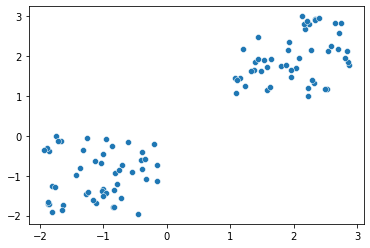

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X = -2 * np.random.rand(100, 2)
X1 = 1 + 2 * np.random.rand(50, 2)
X[50:100, :] = X1

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.show()

Menentukan pemilihan jumlah _cluster_ (K) dengan membuat grafik _elbow curve_ yang menghasilkan metrik evaluasi inersia:

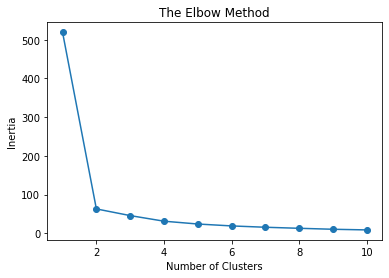

In [14]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.scatter(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Dari grafik didapatkan bahwa nilai inersia menjadi stabil saat berada di nilai 2 _clusters_, sehingga dipilih nilai K (atau `n_clusters`) = 2.

Berikutnya melakukan prediksi klaster dan menambahkan titik _centroid_-nya:

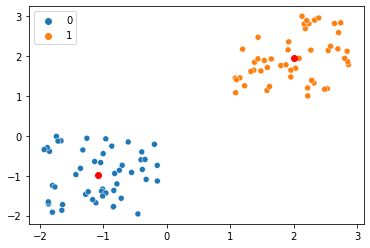

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

clusters = kmeans.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="r")
plt.show()

**Menangani masalah segmentasi pelanggan grosir**

Tujuan dari masalah ini adalah untuk menyegmentasikan klien distributor grosir berdasarkan pengeluaran tahunan mereka pada berbagai kategori produk, wilayah, dll.

[Sumber Data](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv)

In [16]:
import pandas as pd

df = pd.read_csv('dataset/wholesale_customers_data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Karena K-Means adalah algoritme berbasis jarak, perbedaan _magnitude_ dapat menimbulkan masalah sehingga semua variabel harus disesuaikan ke magnitude yang sama, menggunakan `StandardScaler`:

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


Menggunakan grafik _elbow curve_ untuk menentukan jumlah optimal _cluster_:

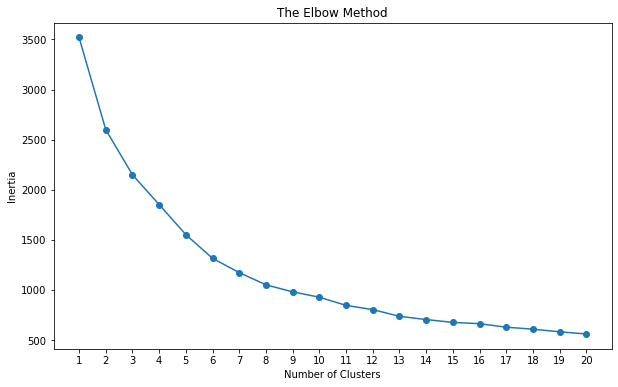

In [18]:
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia)
plt.scatter(range(1, 21), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 21))
plt.show()

Kira-kira jumlah klaster yang dapat dipilih berdasarkan grafik tersebut adalah abntara 5 hingga 8. Coba tetapkan 6 klaster dan latih model untuk kemudian ditambahkan ke dalam _data frame_ dataset:

In [19]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_data)
pred_cluster = kmeans.predict(scaled_data)

df['Cluster'] = pred_cluster
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,3


Kemudian menampilkan ringkasan statistik dari masing-masing klaster:

In [20]:
cluster_to_df = {}
for cluster in df.Cluster.sort_values().unique():
    cluster_to_df[cluster] = df[df.Cluster==cluster]

for cluster, df_cluster in cluster_to_df.items():
    print("Summary Statistics of cluster-{}:".format(cluster))
    display(df_cluster.describe())

Summary Statistics of cluster-0:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,1.046512,1.313953,10517.569767,3208.755814,4128.313953,3136.674419,868.186047,1068.488372,0.0
std,0.211825,0.466820,8003.506597,3710.931508,3335.332414,3067.466801,1240.678937,1025.708131,0.0
min,1.000000,1.000000,3.000000,258.000000,489.000000,91.000000,5.000000,7.000000,0.0
25%,1.000000,1.000000,4070.250000,1051.500000,1820.000000,957.000000,206.250000,384.000000,0.0
50%,1.000000,1.000000,8770.500000,1914.000000,2885.000000,2164.500000,389.500000,796.000000,0.0
75%,1.000000,2.000000,15654.000000,3735.000000,5315.250000,4308.000000,818.500000,1352.000000,0.0
max,2.000000,2.000000,31614.000000,23527.000000,16966.000000,15601.000000,5828.000000,6854.000000,0.0


Summary Statistics of cluster-1:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,125.0,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.0
mean,2.0,2.672000,7762.856000,9173.568000,14341.768000,1376.256000,6163.592000,1659.128000,1.0
std,0.0,0.644781,7305.471107,5286.803442,6799.923084,1294.345749,3468.760948,1970.945111,0.0
min,2.0,1.000000,18.000000,1124.000000,4523.000000,33.000000,549.000000,3.000000,1.0
25%,2.0,3.000000,1989.000000,6152.000000,9568.000000,480.000000,3837.000000,531.000000,1.0
50%,2.0,3.000000,5417.000000,7779.000000,12232.000000,1031.000000,5162.000000,1265.000000,1.0
75%,2.0,3.000000,11867.000000,11114.000000,19172.000000,1762.000000,7677.000000,2124.000000,1.0
max,2.0,3.000000,31714.000000,36423.000000,36486.000000,8132.000000,17120.000000,16523.000000,1.0


Summary Statistics of cluster-2:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,1.065217,2.782609,35606.304348,4860.717391,5512.086957,9961.565217,889.152174,2659.456522,2.0
std,0.249637,0.593035,19362.663648,5111.798317,4547.261998,10151.161253,993.767600,3022.297476,0.0
min,1.000000,1.000000,4983.000000,286.000000,471.000000,532.000000,20.000000,3.000000,2.0
25%,1.000000,3.000000,24285.250000,2177.000000,2500.000000,4486.750000,263.000000,1103.000000,2.0
50%,1.000000,3.000000,33585.500000,3832.500000,4613.000000,8656.000000,612.000000,1894.000000,2.0
75%,1.000000,3.000000,43012.500000,4997.250000,7067.500000,13201.000000,1103.250000,2834.000000,2.0
max,2.000000,3.000000,112151.000000,29627.000000,21042.000000,60869.000000,4948.000000,14472.000000,2.0


Summary Statistics of cluster-3:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,172.0,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0
mean,1.0,3.0,9133.005814,2983.023256,3440.180233,2235.767442,772.395349,999.744186,3.0
std,0.0,0.0,7321.473931,2988.033265,2939.576947,2233.887712,1115.070798,1005.315157,0.0
min,1.0,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,3.0
25%,1.0,3.0,3094.500000,1131.250000,1656.250000,596.750000,172.250000,341.500000,3.0
50%,1.0,3.0,7149.000000,2007.000000,2489.500000,1395.500000,352.500000,689.500000,3.0
75%,1.0,3.0,13558.750000,3708.000000,4248.000000,3152.500000,915.000000,1329.250000,3.0
max,1.0,3.0,31812.000000,21858.000000,16483.000000,9735.000000,6907.000000,5137.000000,3.0


Summary Statistics of cluster-4:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
25%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
50%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
75%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0
max,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,4.0


Summary Statistics of cluster-5:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,10.0,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0
mean,2.0,2.500000,15964.900000,34708.500000,48536.90000,3054.600000,24875.200000,2942.800000,5.0
std,0.0,0.849837,14394.616621,19308.486409,20553.47215,2689.795994,8250.298699,1966.992504,0.0
min,2.0,1.000000,85.000000,4980.000000,26866.00000,36.000000,17740.000000,903.000000,5.0
25%,2.0,2.250000,6741.750000,24217.750000,32482.00000,996.750000,19032.000000,1360.750000,5.0
50%,2.0,3.000000,10658.500000,29109.000000,42761.00000,2924.000000,22120.500000,2443.500000,5.0
75%,2.0,3.000000,21223.000000,44240.000000,58591.25000,4365.500000,26083.500000,4576.750000,5.0
max,2.0,3.000000,44466.000000,73498.000000,92780.00000,7782.000000,40827.000000,6465.000000,5.0


Dari terbentuknya kelompok klaster tersebut, berikutnya dapat dilakukan analisis yang lebih lanjut mengenai keunikan dari masing-masing kelompok untuk mendapatkan kriteria kategorinya.